In [1]:
import re
import pdfplumber
import requests 
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with pdfplumber.open("sche.pdf") as pdf:
    page = pdf.pages[0]
    text = page.extract_text()

In [3]:
tet = text.split("\n")
prog = re.compile(r'[A-Z]{3,5} [0-9]{3}')
dayprog = re.compile(r'\bSUN|MON|TUE|WED|THU')
cls = prog.findall(text)
print(cls)

courses = [["", "","",""],["", "","",""],["", "","",""],["", "","",""],["", "","",""],["", "","",""]];

i = -1;
x= 0;

for line in tet:
    if prog.findall(line):
        coursename = prog.findall(line);
        x=0;
        i= i+1;
        courses[i][0] = coursename
        
    if dayprog.findall(line):
        x= x+1;
        courses[i][x] = (dayprog.findall(line))
        
    
    

print(courses)


['ENG 350', 'JRL 301', 'LIT 302', 'LIT 401', 'MGT 201']
[[['ENG 350'], ['TUE'], ['THU'], ['SUN']], [['JRL 301'], ['MON'], ['WED'], ''], [['LIT 302'], ['MON'], ['WED'], ''], [['LIT 401'], ['TUE'], ['THU'], ['SUN']], [['MGT 201'], ['TUE'], ['THU'], ['SUN']], ['', '', '', '']]


In [4]:
prog = re.compile(r'\bMON|TUE')
day = prog.findall(text)
day

['TUE', 'MON', 'MON', 'TUE', 'TUE']

In [5]:
hour = [];
prog = re.compile(r'[0-9]{1,2}[:][0-9]{2}[a-z]{2}.')
for line in text.split():
    if prog.match(line):
        hour.append(line);

In [6]:
b = []

#for i in hour :
 #   if i not in b:
  #      b.append(i)
b= hour;
entry =[re.split("-", entry, 9) for entry in b]

sount =0;
newhour = []
start= []
end= []
count = 0;

for string in entry:
    for lime in string:
        def convert(time_string):
            date_var = time.strptime(time_string, '%I:%M%p')

            return date_var

        my_time = convert(lime)
        
        
        if my_time.tm_min == 15:
            newhour.append(my_time.tm_hour + .25);
            
        if my_time.tm_min == 30:
            newhour.append(my_time.tm_hour + .5);
            
        if my_time.tm_min == 45:
            newhour.append(my_time.tm_hour + .75);
            
        if my_time.tm_min == 0:
            newhour.append(my_time.tm_hour);
            
        
        if sount == 0:
            start.append(newhour[count]);
            sount = 1;
        else:
            end.append(newhour[count]);
            sount = 0;
        
        
        count+=1;

last = [];
for i, j in zip(end,start):
 
    last.append(i - j)

print(last)
print(b)
print(newhour)
print(start)
print(end)

[1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
['11:45am-12:45pm', '11:45am-12:45pm', '11:45am-12:45pm', '4:00pm-5:30pm', '4:00pm-5:30pm', '9:45am-11:15am', '9:45am-11:15am', '10:30am-11:30am', '10:30am-11:30am', '10:30am-11:30am', '2:15pm-3:15pm', '2:15pm-3:15pm', '2:15pm-3:15pm']
[11.75, 12.75, 11.75, 12.75, 11.75, 12.75, 16, 17.5, 16, 17.5, 9.75, 11.25, 9.75, 11.25, 10.5, 11.5, 10.5, 11.5, 10.5, 11.5, 14.25, 15.25, 14.25, 15.25, 14.25, 15.25]
[11.75, 11.75, 11.75, 16, 16, 9.75, 9.75, 10.5, 10.5, 10.5, 14.25, 14.25, 14.25]
[12.75, 12.75, 12.75, 17.5, 17.5, 11.25, 11.25, 11.5, 11.5, 11.5, 15.25, 15.25, 15.25]


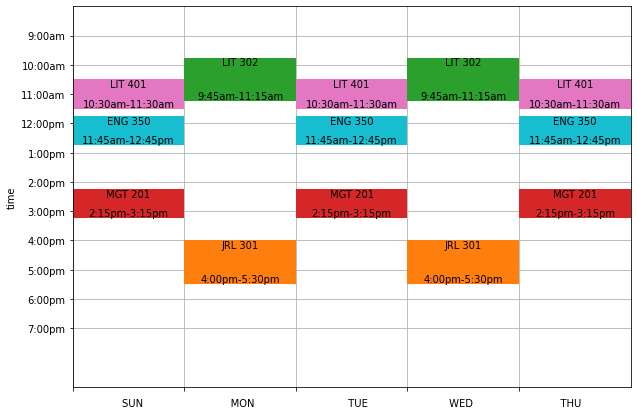

In [9]:

fig, gnt = plt.subplots()

# Setting X-axis limits
gnt.set_xlim(0, 5)
gnt.set_ylim(8, 21)

# Setting labels for x-axis and y-axis 
gnt.set_xlabel('SUN                            MON                              TUE                          WED                            THU')
gnt.set_ylabel('time')

ax = plt.gca()
ax.invert_yaxis()

# Setting ticks on y-axis
gnt.set_yticks([9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19])

# Labelling tickes of y-axis
gnt.set_yticklabels(['9:00am', '10:00am', '11:00am','12:00pm','1:00pm','2:00pm','3:00pm','4:00pm','5:00pm','6:00pm','7:00pm'])


gnt.set_xticks([0, 1, 2, 3, 4])
gnt.set_xticklabels([])

# Setting graph attribute
gnt.grid(True)
colour= ['tab:cyan', 'tab:orange', 'tab:green', 'tab:pink', 'tab:red']

# Declaring a bar in schedule
i=0;
x=0;
while(i<5):
    col = colour[i];
    for day in courses[i]:
        if day == ["SUN"]:
            gnt.broken_barh([(0, 1)], (start[x], last[x]), facecolors =col)
            plt.text(0.5, start[x], cls[i], ha="center", va="top")
            plt.text(0.5, end[x], b[x], ha="center", va="bottom")
            x=x+1;
        if day == ["MON"]:
            gnt.broken_barh([(1, 1)], (start[x], last[x]), facecolors =col)
            plt.text(1.5, start[x], cls[i], ha="center", va="top")
            plt.text(1.5, end[x], b[x], ha="center", va="bottom")
            x=x+1;
        if day == ["TUE"]:
            gnt.broken_barh([(2, 1)], (start[x], last[x]), facecolors =col)
            plt.text(2.5, start[x], cls[i], ha="center", va="top")
            plt.text(2.5, end[x], b[x], ha="center", va="bottom")
            x=x+1;
        if day == ["WED"]:
            gnt.broken_barh([(3, 1)], (start[x], last[x]), facecolors =col)
            plt.text(3.5, start[x], cls[i], ha="center", va="top")
            plt.text(3.5, end[x], b[x], ha="center", va="bottom")
            x=x+1;
        if day == ["THU"]:
            gnt.broken_barh([(4, 1)], (start[x], last[x]), facecolors =col)
            plt.text(4.5, start[x], cls[i], ha="center", va="top")
            plt.text(4.5, end[x], b[x], ha="center", va="bottom")
            x=x+1;
    i=i+1;

   
gnt.set_axisbelow(True)
plt.rcParams["figure.figsize"] = (10,7)
plt.savefig("schdule.png")
